In [124]:
from pathlib import Path
from pprint import pp

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import (
    PredictionErrorDisplay,
    mean_absolute_percentage_error,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from P04_ml.T00_lib.classes import MyUtil
from P04_ml.T00_lib.utils import check_jupyter


In [125]:
SAVE_DATA = False

In [126]:
if check_jupyter():
    BASE_DIR = Path.cwd()  # Current directory of the running file
    DATA_DIR = BASE_DIR.parent.parent / "P03_data_preprocess"
    CURRENT_DIR = BASE_DIR
else:
    BASE_DIR = Path.cwd()  # Base directory of the project
    DATA_DIR = BASE_DIR / "src/P03_data_preprocess"
    CURRENT_DIR = Path(__file__).resolve().parent

dt = MyUtil.get_dt()
print(f"Current Directory: {CURRENT_DIR}")
print(f"Current Date and Time: {dt}")

# Load data
df = pd.read_excel(DATA_DIR / "S07_data_combined_loc.xlsx")
print(df.shape)
df

Code is running in a Jupyter environment.
Current Directory: c:\Users\admin\Coding\research\weld-ml\src\P04_ml\T01_ml
Current Date and Time: 2026-01-03_10-41
(378, 181)


,R,W,D,position,fz_location,"dwell_Fz__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""max""",dwell_Fz__mean_change,"dwell_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.0","dwell_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.0","dwell_Fz__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""var""",...,"weld_Fz__fft_coefficient__attr_""angle""__coeff_26","weld_Fz__fft_coefficient__attr_""angle""__coeff_86","weld_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.2","weld_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.2",weld_Fz__ratio_beyond_r_sigma__r_2.5,weld_Fz__binned_entropy__max_bins_10,weld_Fz__kurtosis,stress_value_5052,stress_value_6061,stress_value_center
0,1400,60,10,0.153846,1.244326,-0.015598,-0.000466,-0.000466,0.001578,0.003409,...,-59.307464,-126.394608,0.000592,0.000077,0.011999,1.996898,0.031761,28,51,12
1,1400,60,10,0.269231,1.625039,-0.015598,-0.000466,-0.000466,0.001578,0.003409,...,-59.307464,-126.394608,0.000592,0.000077,0.011999,1.996898,0.031761,12,107,26
2,1400,60,10,0.384615,1.799653,-0.015598,-0.000466,-0.000466,0.001578,0.003409,...,-59.307464,-126.394608,0.000592,0.000077,0.011999,1.996898,0.031761,33,9,29
3,1400,60,10,0.500000,1.882699,-0.015598,-0.000466,-0.000466,0.001578,0.003409,...,-59.307464,-126.394608,0.000592,0.000077,0.011999,1.996898,0.031761,42,-38,24
4,1400,60,10,0.615385,1.955412,-0.015598,-0.000466,-0.000466,0.001578,0.003409,...,-59.307464,-126.394608,0.000592,0.000077,0.011999,1.996898,0.031761,23,-24,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,1600,80,20,0.384615,1.352393,-0.051580,-0.001162,-0.001162,-0.001007,0.005731,...,99.353987,91.318576,-0.000250,0.000048,0.003282,2.077210,-0.339971,9,-8,11
374,1600,80,20,0.500000,1.529089,-0.051580,-0.001162,-0.001162,-0.001007,0.005731,...,99.353987,91.318576,-0.000250,0.000048,0.003282,2.077210,-0.339971,6,52,10
375,1600,80,20,0.615385,1.657737,-0.051580,-0.001162,-0.001162,-0.001007,0.005731,...,99.353987,91.318576,-0.000250,0.000048,0.003282,2.077210,-0.339971,18,53,10
376,1600,80,20,0.730769,1.712860,-0.051580,-0.001162,-0.001162,-0.001007,0.005731,...,99.353987,91.318576,-0.000250,0.000048,0.003282,2.077210,-0.339971,4,-54,6


In [127]:
# %%
# Extract features and targets
_X = df.iloc[:, :-3].values
_Y = df.iloc[:, -3:].values

# Use only first three columns as features for testing
# _X = df.iloc[:, :3].values
# _Y = df.iloc[:, -3:].values

print(_X.shape)
print(_Y.shape)

(378, 178)
(378, 3)


In [128]:
_X_train, _X_test, _Y_train, _Y_test = train_test_split(
    _X, _Y, test_size=0.3, random_state=0
)
print(_X_train.shape)
print(_X_test.shape)
print(_Y_train.shape)
print(_Y_test.shape)

(264, 178)
(114, 178)
(264, 3)
(114, 3)


In [129]:
scX = StandardScaler()
X_train = scX.fit_transform(_X_train)
X_test = scX.transform(_X_test)

scY = StandardScaler()
Y_train = scY.fit_transform(_Y_train)
Y_test = scY.transform(_Y_test)

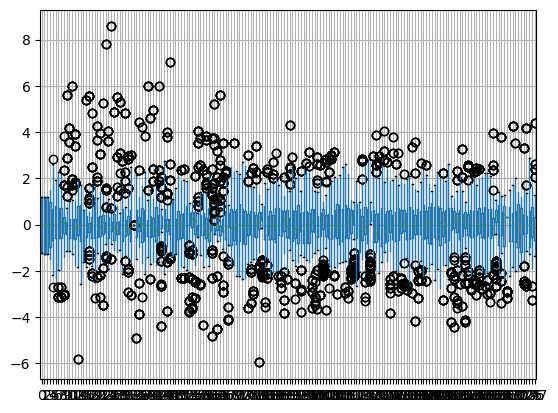

In [130]:
# _X_train.boxplot(figsize=(20,5))
pd.DataFrame(X_train).boxplot()
plt.show()

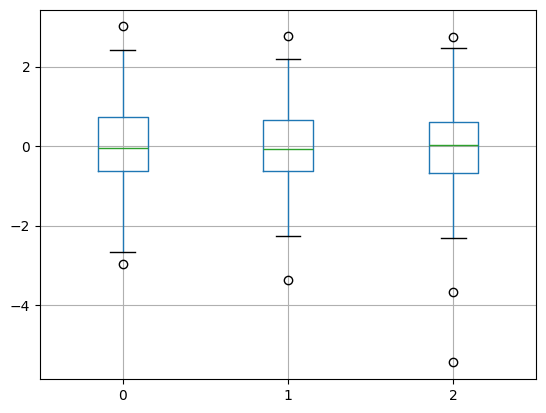

In [131]:
pd.DataFrame(Y_train).boxplot()
plt.show()

In [132]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

# reg = MultiOutputRegressor(estimator=SVR(C=1))
reg = MultiOutputRegressor(estimator=LinearRegression())
# reg = MultiOutputRegressor(
#     estimator=RandomForestRegressor(n_estimators=200, random_state=0)
# )
# reg = MultiOutputRegressor(
#     estimator=GradientBoostingRegressor(n_estimators=200, random_state=0)
# )

In [133]:
reg.fit(X_train, Y_train)

MultiOutputRegressor(estimator=LinearRegression())

In [134]:
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)

print(Y_train_pred.shape)
print(Y_test_pred.shape)

(264, 3)
(114, 3)


In [135]:
def eval_perf(y_true, y_pred):
    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    mape = mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    return mse, mape, r2


def print_perf(data):
    for k, v in data.items():
        print(k, ":", v)


data_arr = []
for i in range(0, _Y.shape[1]):
    mse_train, mape_train, r2_train = eval_perf(
        y_true=Y_train[:, i], y_pred=Y_train_pred[:, i]
    )
    mse_test, mape_test, r2_test = eval_perf(
        y_true=Y_test[:, i], y_pred=Y_test_pred[:, i]
    )

    data = {
        "Y": f"Y-{i + 1}",
        "MSE Train": mse_train,
        "MSE Test": mse_test,
        "MAPE Train": mape_train,
        "MAPE Test": mape_test,
        "R2 Train": r2_train,
        "R2 Test": r2_test,
    }
    # print_perf(data)

    data_arr.append(data)

mse_train, mape_train, r2_train = eval_perf(y_true=Y_train, y_pred=Y_train_pred)
mse_test, mape_test, r2_test = eval_perf(y_true=Y_test, y_pred=Y_test_pred)
print_perf(data)

data = {
    "Y": "Y-All",
    "MSE Train": mse_train,
    "MSE Test": mse_test,
    "MAPE Train": mape_train,
    "MAPE Test": mape_test,
    "R2 Train": r2_train,
    "R2 Test": r2_test,
}
data_arr.append(data)
# print_perf(data)

df_eval = pd.DataFrame.from_dict(data_arr)
display(df_eval)

if SAVE_DATA:
    filename = f"eval_{dt}.xlsx"
    df_eval.to_excel(filename, index=False)

Y : Y-3
MSE Train : 0.5036209656965194
MSE Test : 0.7685072479582914
MAPE Train : 1.9397408989279155
MAPE Test : 1.9185918912963227
R2 Train : 0.49637903430348007
R2 Test : 0.1494353314657606


,Y,MSE Train,MSE Test,MAPE Train,MAPE Test,R2 Train,R2 Test
0,Y-1,0.576735,0.821500,1.898569,1.974584,0.423265,0.162413
1,Y-2,0.769352,1.247685,4.403824,6.358040,0.230648,-0.197093
2,Y-3,0.503621,0.768507,1.939741,1.918592,0.496379,0.149435
3,Y-All,0.616570,0.945898,2.747378,3.417072,0.383430,0.038252


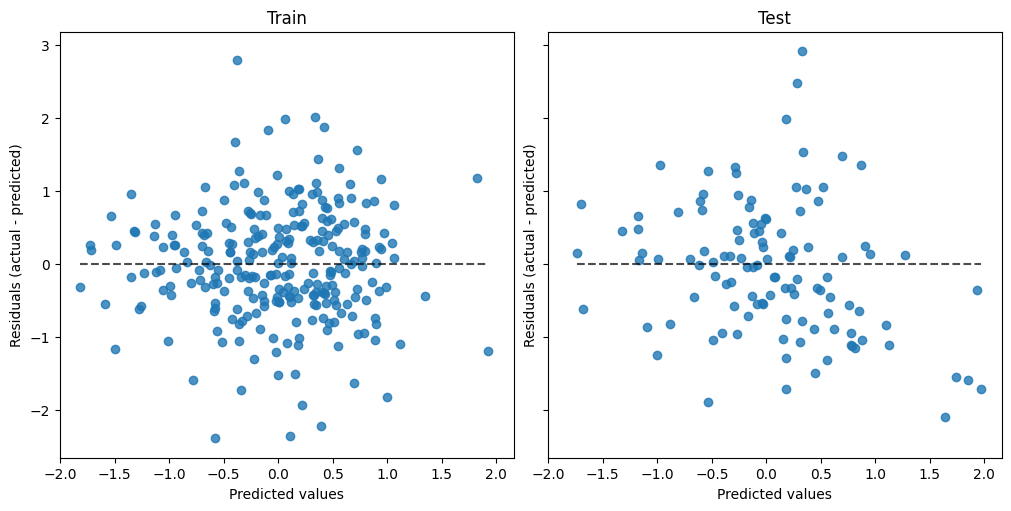

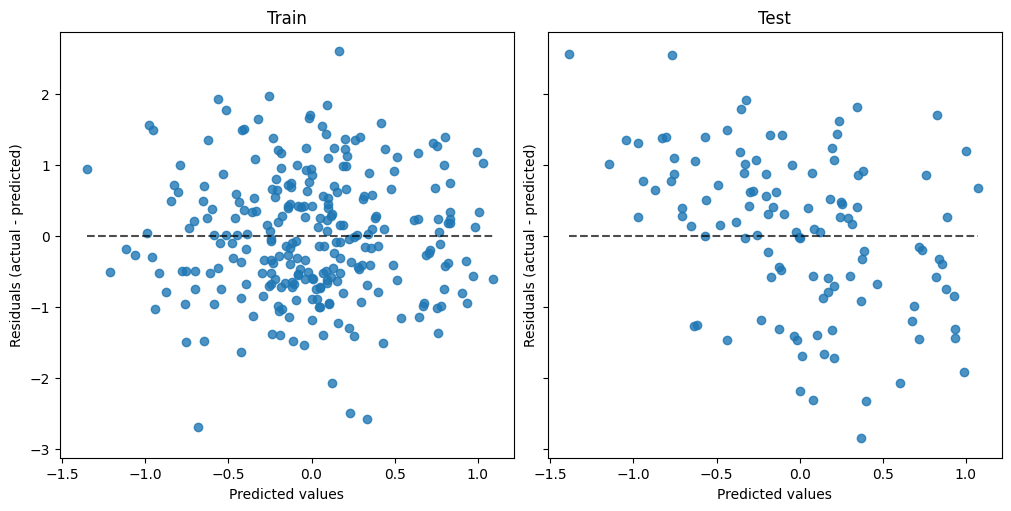

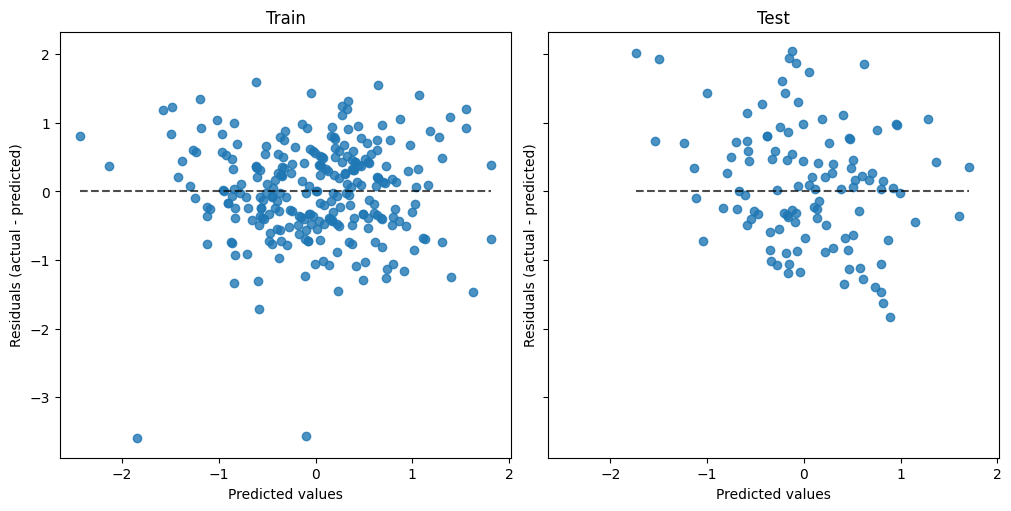

In [136]:
for i in range(0, _Y.shape[1]):
    fig, axes = plt.subplots(
        nrows=1,
        ncols=2,
        figsize=(10, 5),
        constrained_layout=True,
        sharex=True,
        sharey=True,
    )

    display_train = PredictionErrorDisplay(
        y_true=Y_train[:, i], y_pred=Y_train_pred[:, i]
    )
    display_train.plot(ax=axes[0])
    axes[0].set_title("Train")

    display_train = PredictionErrorDisplay(
        y_true=Y_test[:, i], y_pred=Y_test_pred[:, i]
    )
    display_train.plot(ax=axes[1])
    axes[1].set_title("Test")

    if SAVE_DATA:
        filename = f"res_plot_{dt}_{i}.png"
        fig.savefig(filename, dpi=300)

    plt.show()